In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
df = pd.read_csv('Data_for_Clustering - Data_for_Clustering.csv',low_memory = False)
df[['Latitude', 'Longitude']] = df[['Latitude', 'Longitude']].apply(pd.to_numeric, errors='coerce')
df.head(1000)

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
0,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Peddakotla B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.568900,77.856240
1,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Pinnadhari B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.528100,77.857014
2,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Yerraguntapalle B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.561111,77.857150
3,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Obulareddipalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.248800,78.258800
4,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Odulapalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.245550,78.247700
...,...,...,...,...,...,...,...,...,...,...,...
995,Bihar Circle,"East Region, Bhagalpur",Begusarai Division,Deopura BO,848201,BO,Delivery,BEGUSARAI,BIHAR,25.416675,86.129379
996,Bihar Circle,"East Region, Bhagalpur",Begusarai Division,Samsa BO,848201,BO,Delivery,BEGUSARAI,BIHAR,25.416675,86.129379
997,Bihar Circle,"East Region, Bhagalpur",Begusarai Division,Fateha BO,851111,BO,Delivery,BEGUSARAI,BIHAR,25.416675,86.129379
998,Bihar Circle,"East Region, Bhagalpur",Begusarai Division,Manopur BO,851111,BO,Delivery,BEGUSARAI,BIHAR,25.416675,86.129379


In [2]:
df.columns


Index(['CircleName', 'RegionName', 'DivisionName', 'OfficeName', 'Pincode',
       'OfficeType', 'Delivery', 'District', 'StateName', 'Latitude',
       'Longitude'],
      dtype='object')

# In Data Analysis we do
   1. Missing Values
   2. Explore about numerical variables
   3. Explore about categorical variables
   4. Finding relationships between features

In [3]:
df.isnull().sum()

CircleName         0
RegionName        53
DivisionName       2
OfficeName         0
Pincode            0
OfficeType         0
Delivery           0
District           0
StateName          0
Latitude        8883
Longitude       9041
dtype: int64

['RegionName', 'DivisionName', 'Latitude', 'Longitude']


<Axes: >

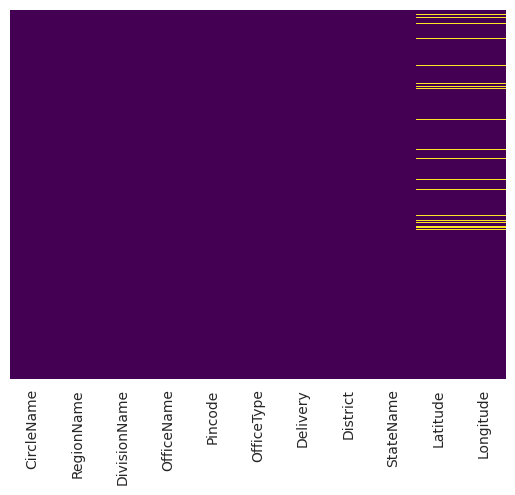

In [4]:
features_with_nullvals = [feature for feature in df.columns if df[feature].isnull().sum()>1]
print(features_with_nullvals)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
df.dtypes

CircleName       object
RegionName       object
DivisionName     object
OfficeName       object
Pincode           int64
OfficeType       object
Delivery         object
District         object
StateName        object
Latitude        float64
Longitude       float64
dtype: object

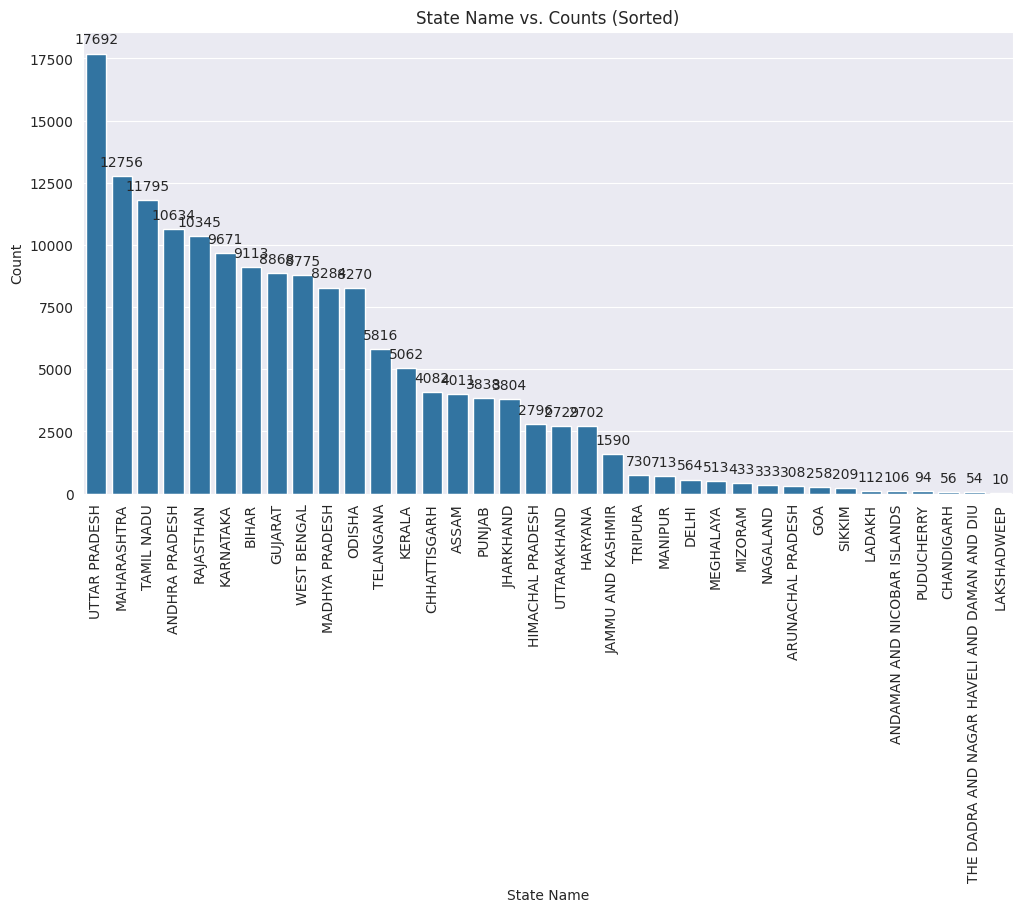

In [6]:
# prompt: plot states in statename vs their counts, sorted in descending order of counts, with count values on top

state_counts = df.StateName.value_counts()
sorted_state_counts = state_counts.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=sorted_state_counts.index, y=sorted_state_counts.values)  # Store the axes object

# Add count values on top of bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.xticks(rotation=90)
plt.xlabel("State Name")
plt.ylabel("Count")
plt.title("State Name vs. Counts (Sorted)")
plt.show()

# The visualization for Telangana State Pincodes on a Graph

In [7]:
df_telangana = df[df['StateName']=='TELANGANA']
df_telangana.head(1000)

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
138,Telangana Circle,Hyderabad Region,Nizamabad Division,Arsapalli B.O,503186,BO,Delivery,NIZAMABAD,TELANGANA,18.684554,78.077374
139,Telangana Circle,Hyderabad Region,Nizamabad Division,Camp Ootpalli B.O,503180,BO,Delivery,NIZAMABAD,TELANGANA,18.532992,77.618717
140,Telangana Circle,Hyderabad Region,Nizamabad Division,Eraspalli B.O,503180,BO,Delivery,NIZAMABAD,TELANGANA,18.532992,77.618717
141,Telangana Circle,Hyderabad Region,Nizamabad Division,Singitham B.O,503187,BO,Delivery,KAMAREDDY,TELANGANA,18.309656,77.946632
142,Telangana Circle,Hyderabad Region,Nizamabad Division,Mahmadpur B.O,503101,BO,Delivery,KAMAREDDY,TELANGANA,18.210820,78.485349
...,...,...,...,...,...,...,...,...,...,...,...
3381,Telangana Circle,Hyderabad Region,Nizamabad Division,Gadepalli B.O,503212,BO,Delivery,NIZAMABAD,TELANGANA,18.968804,78.222956
3382,Telangana Circle,Hyderabad Region,Nizamabad Division,Marampalli B.O,503212,BO,Delivery,NIZAMABAD,TELANGANA,18.914375,78.219261
3383,Telangana Circle,Hyderabad Region,Nizamabad Division,Vannel K B.O,503212,BO,Delivery,NIZAMABAD,TELANGANA,18.937682,78.185878
3384,Telangana Circle,Hyderabad Region,Nizamabad Division,Motha B.O,503311,BO,Delivery,NIZAMABAD,TELANGANA,18.740338,78.411278


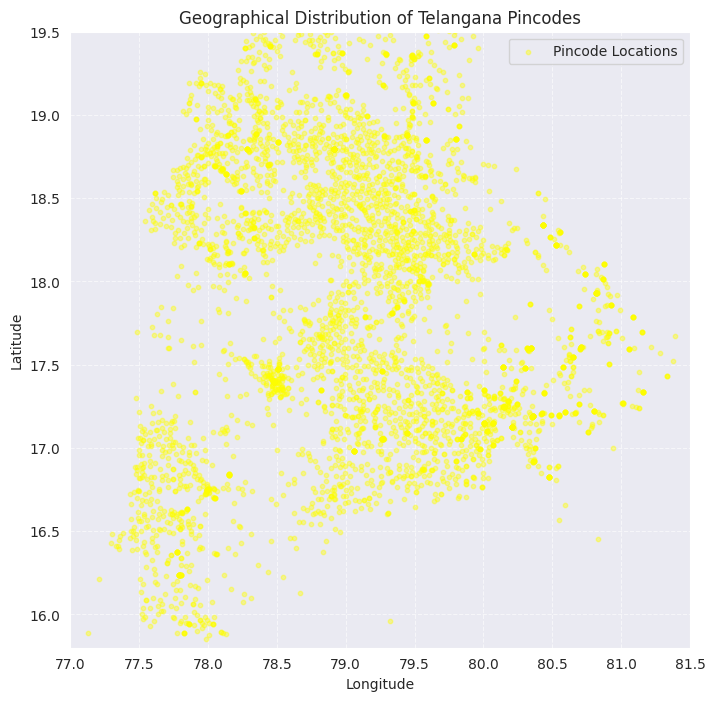

In [8]:
#
df_telangana = df_telangana.dropna(subset=["Latitude", "Longitude"])
import matplotlib.pyplot as plt

# Define Telangana bounding box
lat_min, lat_max = 15.8, 19.5
lon_min, lon_max = 77.0, 81.5

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 8))
longitudes = df_telangana["Longitude"]
latitudes = df_telangana["Latitude"]
# Scatter plot of pincode locations
ax.scatter(longitudes, latitudes, c="yellow", alpha=0.4, s=10, label="Pincode Locations")

# Set labels and title
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Geographical Distribution of Telangana Pincodes")

# Set axis limits to focus on Telangana
ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)

# Show grid and legend
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()

# Show plot
plt.show()



# Implementing K -Means Clustering for our Points

## Verification and looking at What our clusters are supposed to look like (Just using the Sci-kit Library)

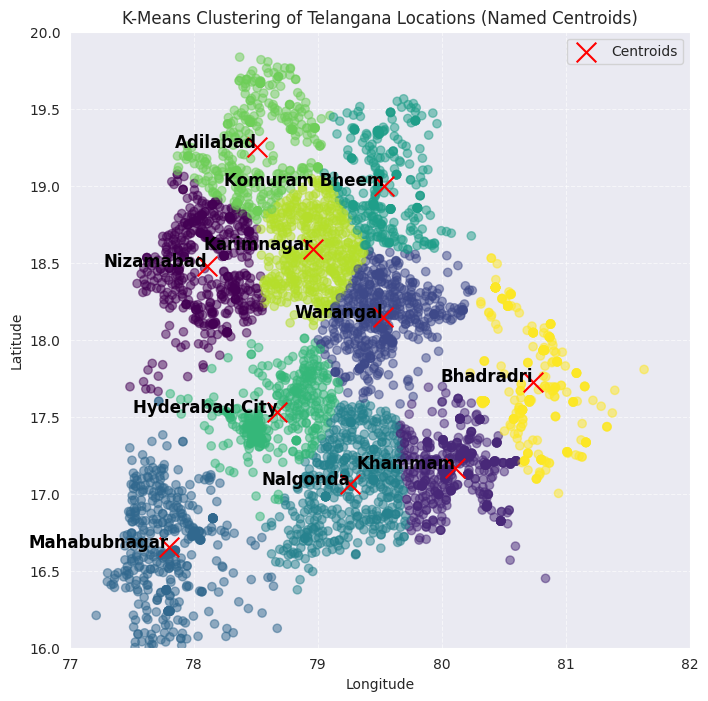

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Drop NaN values
df_telangana = df_telangana.dropna(subset=["Latitude", "Longitude"])

# Filter data to restrict within the specified range
df_telangana = df_telangana[
    (df_telangana["Longitude"] >= 77) & (df_telangana["Longitude"] <= 82) &
    (df_telangana["Latitude"] >= 16) & (df_telangana["Latitude"] <= 20)
]

# Extract latitude and longitude for clustering
X = df_telangana[['Latitude', 'Longitude']].values  # No scaling applied

# Run K-Means with k=5 (adjust if necessary)
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
df_telangana["cluster"] = kmeans.fit_predict(X)

# Get centroids
centroids = kmeans.cluster_centers_

# Plot the clusters
plt.figure(figsize=(8, 8))
plt.scatter(df_telangana["Longitude"], df_telangana["Latitude"], c=df_telangana["cluster"], cmap="viridis", alpha=0.5)
plt.scatter(centroids[:, 1], centroids[:, 0], c='red', marker='x', s=200, label="Centroids")
cluster_names = ["Nizamabad","Khammam","Warangal","Mahabubnagar","Nalgonda","Komuram Bheem","Hyderabad City","Adilabad","Karimnagar","Bhadradri"]
# Add names to centroids
for i, (lat, lon) in enumerate(centroids):
    plt.text(lon, lat, cluster_names[i], fontsize=12, ha='right', color='black', fontweight='bold')

# Set axis labels and title
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("K-Means Clustering of Telangana Locations (Named Centroids)")

# Restrict axis limits
plt.xlim(77, 82)
plt.ylim(16, 20)

plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


## Implementing the K - Means Clustering Algorithm from scratch without help of any library

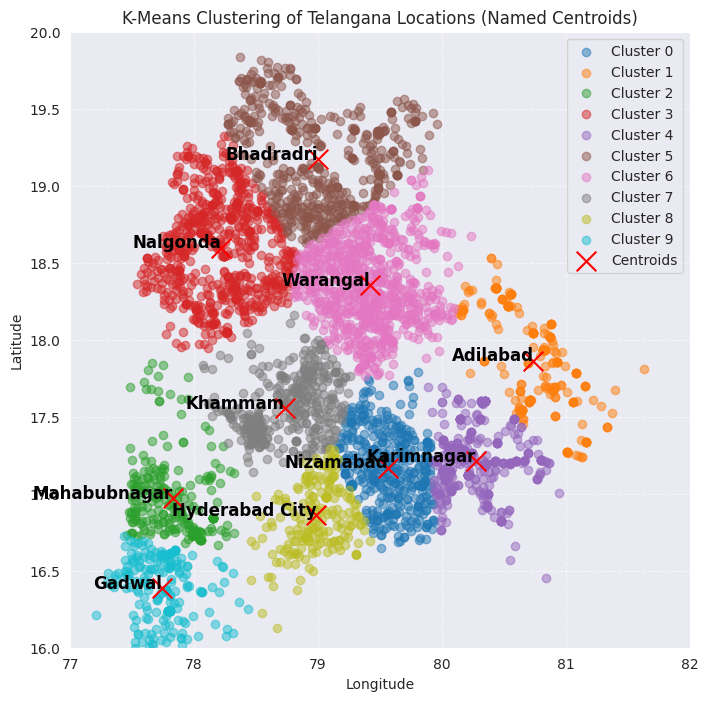

In [44]:
import random
import math
df_telangana = df_telangana.dropna(subset=["Latitude", "Longitude"])
# Always make sure to get only Proper data
df_telangana = df_telangana[
    (df_telangana["Longitude"] >= 77) & (df_telangana["Longitude"] <= 82) &
    (df_telangana["Latitude"] >= 16) & (df_telangana["Latitude"] <= 20)
]
data_points = df_telangana[['Latitude', 'Longitude']].values.tolist()
def distance(p1,p2):
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)
def initialize_centroids(data,k):
    # picking k random points as centroids from given data points
    return random.sample(list(data), k)
def assign_clusters(data,centroids):
    # any other data point is assigned to the cluster , nearest centroid's cluster
    clusters = {i:[] for i in range(len(centroids))}
    for point in data:
        distances = [distance(point, centroid) for centroid in centroids]
        cluster_index = distances.index(min(distances))
        clusters[cluster_index].append(point)
    return clusters
def compute_new_centroids(clusters):
    # Forming the new centroids
    new_centroids = []
    for cluster in clusters.values():
        if cluster:
         centroid = [sum(dim) / len(cluster) for dim in zip(*cluster)]
        else:
         centroid = random.choice(list(clusters.values())) if any(clusters.values()) else [0, 0]  # Example default
        new_centroids.append(centroid)
    return new_centroids
def k_means(data, k,max_iter=100):
    centroids = initialize_centroids(data,k)
    for iter in range(max_iter):
        clusters = assign_clusters(data,centroids)
        new_centroids = compute_new_centroids(clusters)
        if new_centroids == centroids:
            break
        centroids = new_centroids
    return clusters,centroids
k=10
clusters,centroids = k_means(data_points,k)
df_telangana["Cluster"] = [None] * len(df_telangana)
for cluster_index, points in clusters.items():
    for point in points:
        idx = df_telangana[(df_telangana["Latitude"] == point[0]) & (df_telangana["Longitude"] == point[1])].index
        df_telangana.loc[idx, "Cluster"] = cluster_index
cluster_names = ["Gadwal","Mahabubnagar","Nalgonda","Khammam","Hyderabad City","Bhadradri","Warangal","Nizamabad","Karimnagar","Adilabad"]

# Plot Clusters
plt.figure(figsize=(8, 8))
sorted_centroids = sorted(centroids, key=lambda x: (x[1]))  # Sort by Latitude, then Longitude

# Annotate Centroids Properly
for i, (lat, lon) in enumerate(sorted_centroids):
    if i < len(cluster_names):
        plt.text(lon, lat, cluster_names[i], fontsize=12, ha='right', color='black', fontweight='bold')
    else:
        plt.text(lon, lat, f"Cluster {i}", fontsize=12, ha='right', color='black', fontweight='bold')

for cluster_index, points in clusters.items():
    latitudes = [p[0] for p in points]
    longitudes = [p[1] for p in points]
    plt.scatter(longitudes, latitudes, label=f"Cluster {cluster_index}", alpha=0.5)

# Plot Centroids
centroid_lats = [c[0] for c in centroids]
centroid_lons = [c[1] for c in centroids]
plt.scatter(centroid_lons, centroid_lats, c='red', marker='x', s=200, label="Centroids")

# Annotate Centroids

# Formatting
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("K-Means Clustering of Telangana Locations (Named Centroids)")
plt.xlim(77, 82)
plt.ylim(16, 20)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



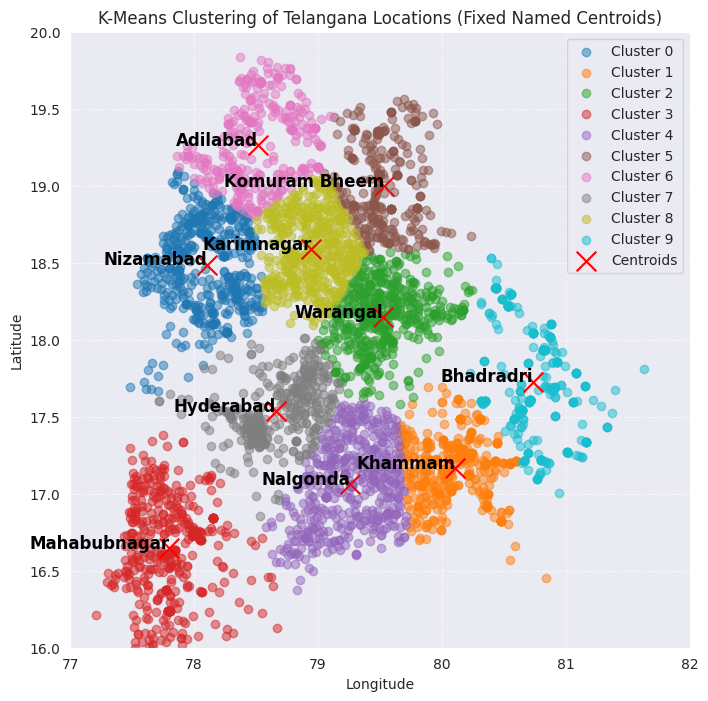

In [48]:
import random
import math
import matplotlib.pyplot as plt

# Predefined centroids for Telangana cities (Fixed)
fixed_centroids = [
    (18.6725, 78.0941),  # Nizamabad
    (17.2472, 80.1514),  # Khammam
    (17.9784, 79.5910),  # Warangal
    (16.7485, 78.0035),  # Mahabubnagar
    (17.0566, 79.2684),  # Nalgonda
    (19.3763, 79.4637),  # Komuram Bheem
    (19.6667, 78.5333),  # Adilabad
    (17.3850, 78.4867),  # Hyderabad
    (18.4392, 79.1288),  # Karimnagar
    (18.2871, 80.6540)   # Bhadradri
]

# Define Fixed Cluster Names
cluster_names = [
    "Nizamabad", "Khammam", "Warangal", "Mahabubnagar", "Nalgonda",
    "Komuram Bheem", "Adilabad", "Hyderabad", "Karimnagar", "Bhadradri"
]

def distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def assign_clusters(data, centroids):
    """Assign each data point to the nearest centroid"""
    clusters = {i: [] for i in range(len(centroids))}
    for point in data:
        distances = [distance(point, centroid) for centroid in centroids]
        cluster_index = distances.index(min(distances))  # Nearest centroid
        clusters[cluster_index].append(point)
    return clusters

def compute_new_centroids(clusters):
    """Recalculate centroids as the mean of assigned points"""
    new_centroids = []
    for i, cluster in clusters.items():
        if cluster:
            centroid = [sum(dim) / len(cluster) for dim in zip(*cluster)]
        else:
            centroid = fixed_centroids[i]  # Use predefined centroid for empty clusters
        new_centroids.append(centroid)
    return new_centroids

def k_means(data, fixed_centroids, max_iter=100):
    """K-means algorithm with fixed initial centroids"""
    centroids = fixed_centroids  # Use predefined centroids
    for _ in range(max_iter):
        clusters = assign_clusters(data, centroids)
        new_centroids = compute_new_centroids(clusters)
        if new_centroids == centroids:
            break
        centroids = new_centroids
    return clusters, centroids

# Filter and Extract Data Points
df_telangana = df_telangana.dropna(subset=["Latitude", "Longitude"])
df_telangana = df_telangana[
    (df_telangana["Longitude"] >= 77) & (df_telangana["Longitude"] <= 82) &
    (df_telangana["Latitude"] >= 16) & (df_telangana["Latitude"] <= 20)
]
data_points = df_telangana[['Latitude', 'Longitude']].values.tolist()

# Run K-Means with Fixed Centroids
clusters, centroids = k_means(data_points, fixed_centroids)

# Assign Cluster Labels to DataFrame
df_telangana["Cluster"] = [None] * len(df_telangana)
for cluster_index, points in clusters.items():
    for point in points:
        idx = df_telangana[
            (df_telangana["Latitude"] == point[0]) & (df_telangana["Longitude"] == point[1])
        ].index
        df_telangana.loc[idx, "Cluster"] = cluster_index

# Plot Clusters
plt.figure(figsize=(8, 8))
for cluster_index, points in clusters.items():
    latitudes = [p[0] for p in points]
    longitudes = [p[1] for p in points]
    plt.scatter(longitudes, latitudes, label=f"Cluster {cluster_index}", alpha=0.5)

# Plot Centroids
centroid_lats = [c[0] for c in centroids]
centroid_lons = [c[1] for c in centroids]
plt.scatter(centroid_lons, centroid_lats, c='red', marker='x', s=200, label="Centroids")

# Annotate Centroids with Fixed Names
for i, (lat, lon) in enumerate(centroids):
    plt.text(lon, lat, cluster_names[i], fontsize=12, ha='right', color='black', fontweight='bold')

# Formatting
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("K-Means Clustering of Telangana Locations (Fixed Named Centroids)")
plt.xlim(77, 82)
plt.ylim(16, 20)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
